# **Task 3 before applying Dimmensionality reduction**

Importing the dataset

In [1]:
import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/CGM/HIGGS_6M.csv")
print(dataset)

         1.000000000000000000e+00  ...  8.766783475875854492e-01
0                             1.0  ...                  0.798343
1                             1.0  ...                  0.780118
2                             0.0  ...                  0.957904
3                             1.0  ...                  0.808487
4                             0.0  ...                  0.957818
...                           ...  ...                       ...
5999994                       0.0  ...                  0.655532
5999995                       1.0  ...                  0.925974
5999996                       0.0  ...                  0.838066
5999997                       1.0  ...                  1.288571
5999998                       1.0  ...                  1.780451

[5999999 rows x 29 columns]


In [2]:
import matplotlib as plt
import numpy as np

**Selecting the last 500k data**

In [3]:
X = dataset.iloc[5500000:, 1:].values
Y = dataset.iloc[5500000:, 0].values

In [4]:
print(Y)

[0. 1. 0. ... 0. 1. 1.]


Splitting the datset into the Training set and Test Set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

Feature Scaling the dataset

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Using Light GBM(Gradient Boosting Model) as a classifier**

In [7]:
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Confusion Matrix**

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[41668 17148]
 [16360 49824]]


0.731936

In [9]:
r_probs = [0 for _ in range(len(Y_test))]
classifier_probs = classifier.predict_proba(X_test)


In [10]:
classifier_probs = classifier_probs[:, 1]


In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

In [12]:
r_auc = roc_auc_score(Y_test, r_probs)
classifier_auc = roc_auc_score(Y_test, classifier_probs)


In [13]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Light GBM : AUROC = %.3f' % (classifier_auc))



Random (chance) Prediction: AUROC = 0.500
Light GBM : AUROC = 0.812


In [14]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
classifier_fpr, classifier_tpr, _ = roc_curve(Y_test, classifier_probs)


**Plotting the ROC Curve**

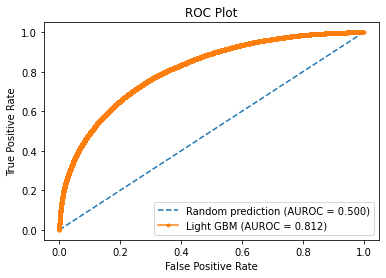

In [15]:
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(classifier_fpr, classifier_tpr, marker='.', label='Light GBM (AUROC = %0.3f)' % classifier_auc)




# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()